Будем использовать PIL для работы с картинками

In [4]:
from PIL import Image

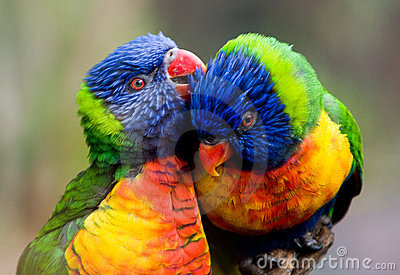

In [5]:
im = Image.open('birds.jpg')
im

Представим картинку как массив

In [6]:
import numpy as np
imarr = np.asarray(im)
imarr

array([[[140, 150, 116],
        [139, 149, 115],
        [137, 147, 113],
        ...,
        [108, 108,  96],
        [111, 109,  97],
        [111, 109,  97]],

       [[138, 148, 114],
        [138, 148, 114],
        [137, 147, 113],
        ...,
        [109, 107,  95],
        [109, 107,  95],
        [109, 107,  95]],

       [[136, 146, 112],
        [136, 146, 112],
        [135, 145, 111],
        ...,
        [109, 107,  95],
        [107, 105,  93],
        [107, 105,  93]],

       ...,

       [[196, 173, 155],
        [195, 172, 154],
        [195, 172, 154],
        ...,
        [159, 145, 160],
        [158, 144, 159],
        [158, 144, 159]],

       [[196, 173, 155],
        [195, 172, 154],
        [195, 172, 154],
        ...,
        [159, 145, 160],
        [158, 144, 159],
        [158, 144, 159]],

       [[196, 173, 155],
        [195, 172, 154],
        [195, 172, 154],
        ...,
        [159, 145, 160],
        [158, 144, 159],
        [158, 144, 159]]

Переведем этот трехмерный массив в массив векторов, где: <br>
    0 - номер строки пикселя <br>
    1 - номер столбца <br>
    2 - r <br>
    3 - g <br>
    4 - b

In [7]:
X = np.full((len(imarr) * len(imarr[0]), 5), 0)

In [8]:
X

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [9]:
for i in range(im.size[1]):
    for j in range(im.size[0]):
        X[i * im.size[0] + j][0] = i
        X[i * im.size[0] + j][1] = j
        X[i * im.size[0] + j][2] = imarr[i][j][0]
        X[i * im.size[0] + j][3] = imarr[i][j][1]
        X[i * im.size[0] + j][4] = imarr[i][j][2]

In [10]:
X

array([[  0,   0, 140, 150, 116],
       [  0,   1, 139, 149, 115],
       [  0,   2, 137, 147, 113],
       ...,
       [274, 397, 159, 145, 160],
       [274, 398, 158, 144, 159],
       [274, 399, 158, 144, 159]])

Пройдемся kmeans на этой матрице

In [11]:
from sklearn.cluster import KMeans
clusters = 3
model = KMeans(n_clusters=clusters)

In [12]:
y = model.fit_predict(X)
y

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

Определим цвет кластера, как среднее арифметическое цветов кластера

In [13]:
mean_color = np.full((clusters, 3), 0) 
mean_color

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [14]:
for i in range(clusters):
    for j in X[y==i]:
        mean_color[i][0] += j[2]
        mean_color[i][1] += j[3]
        mean_color[i][2] += j[4]
    mean_color[i][0] //= len(X[y==i])
    mean_color[i][1] //= len(X[y==i])
    mean_color[i][2] //= len(X[y==i])

In [15]:
mean_color

array([[170, 149,  95],
       [ 62,  52,  60],
       [146, 144,  93]])

Нарисуем новое изображение

In [16]:
nimarr = np.full(imarr.shape, 0)
nimarr

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])

In [17]:
for i in range(im.size[1]):
    for j in range(im.size[0]):
        nimarr[i][j][0] = mean_color[y[i * im.size[0] + j]][0]
        nimarr[i][j][1] = mean_color[y[i * im.size[0] + j]][1]
        nimarr[i][j][2] = mean_color[y[i * im.size[0] + j]][2]
nimarr

array([[[170, 149,  95],
        [170, 149,  95],
        [170, 149,  95],
        ...,
        [146, 144,  93],
        [146, 144,  93],
        [146, 144,  93]],

       [[170, 149,  95],
        [170, 149,  95],
        [170, 149,  95],
        ...,
        [146, 144,  93],
        [146, 144,  93],
        [146, 144,  93]],

       [[170, 149,  95],
        [170, 149,  95],
        [170, 149,  95],
        ...,
        [146, 144,  93],
        [146, 144,  93],
        [146, 144,  93]],

       ...,

       [[170, 149,  95],
        [170, 149,  95],
        [170, 149,  95],
        ...,
        [146, 144,  93],
        [146, 144,  93],
        [146, 144,  93]],

       [[170, 149,  95],
        [170, 149,  95],
        [170, 149,  95],
        ...,
        [146, 144,  93],
        [146, 144,  93],
        [146, 144,  93]],

       [[170, 149,  95],
        [170, 149,  95],
        [170, 149,  95],
        ...,
        [146, 144,  93],
        [146, 144,  93],
        [146, 144,  93]]

In [18]:
nim = Image.fromarray(np.uint8(nimarr))

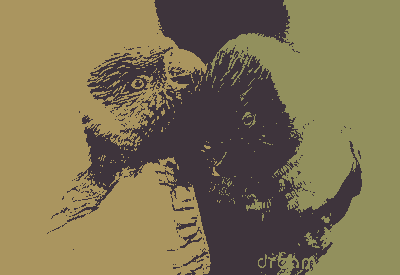

In [19]:
nim

Переделаем это как функцию

In [20]:
import numpy as np
from PIL import Image

def draw(model, im):
    imarr = np.asarray(im)
    X = np.full((len(imarr) * len(imarr[0]), 5), 0)
    for i in range(im.size[1]):
        for j in range(im.size[0]):
            X[i * im.size[0] + j][0] = i
            X[i * im.size[0] + j][1] = j
            X[i * im.size[0] + j][2] = imarr[i][j][0]
            X[i * im.size[0] + j][3] = imarr[i][j][1]
            X[i * im.size[0] + j][4] = imarr[i][j][2]
    y = model.fit_predict(X)
    clusters = max(y) + 1
    mean_color = np.full((clusters, 3), 0) 
    for i in range(clusters):
        for j in X[y==i]:
            mean_color[i][0] += j[2]
            mean_color[i][1] += j[3]
            mean_color[i][2] += j[4]
        mean_color[i][0] //= len(X[y==i])
        mean_color[i][1] //= len(X[y==i])
        mean_color[i][2] //= len(X[y==i])
    nimarr = np.full(imarr.shape, 0)
    for i in range(im.size[1]):
        for j in range(im.size[0]):
            nimarr[i][j][0] = mean_color[y[i * im.size[0] + j]][0]
            nimarr[i][j][1] = mean_color[y[i * im.size[0] + j]][1]
            nimarr[i][j][2] = mean_color[y[i * im.size[0] + j]][2]
    nim = Image.fromarray(np.uint8(nimarr))
    return nim
    

Попробуем поэкперементировать на разных кол-вах кластеров

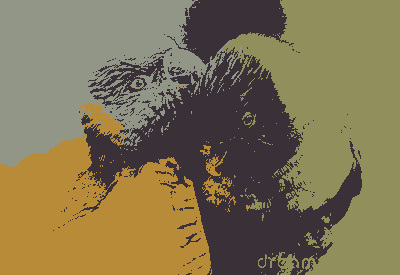

In [21]:
from sklearn.cluster import KMeans
draw(KMeans(n_clusters=4), im)

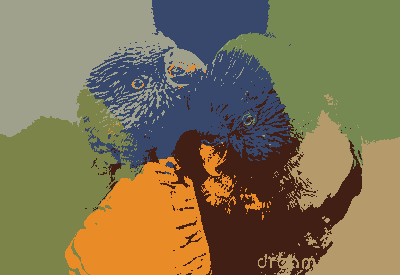

In [22]:
from sklearn.cluster import KMeans
draw(KMeans(n_clusters=7), im)

In [23]:
from sklearn.cluster import KMeans
im10 = draw(KMeans(n_clusters=10), im)

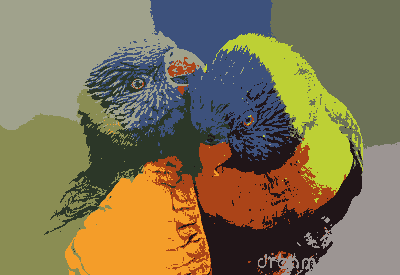

In [30]:
im10

In [31]:
from sklearn.cluster import KMeans
im40 = draw(KMeans(n_clusters=40), im)

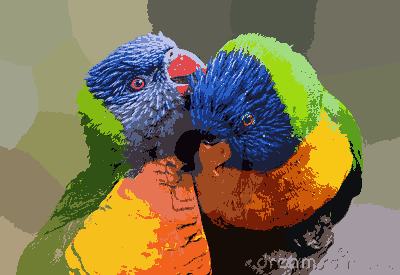

In [32]:
im40

Вполне не плохо. Давайте попробуем другой алгоритм - DBSCAN

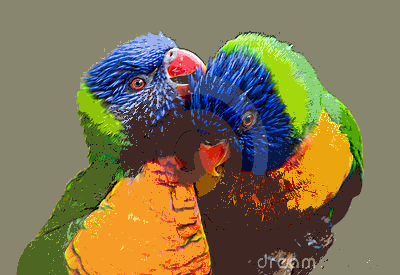

In [25]:
from sklearn.cluster import DBSCAN

draw(DBSCAN(eps=10, min_samples=1), im)

Это мне просто повезло с eps. Но может и не повезти:

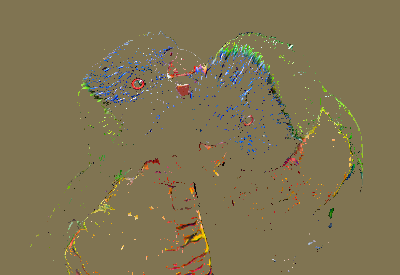

In [35]:
draw(DBSCAN(eps=15, min_samples=1), im)

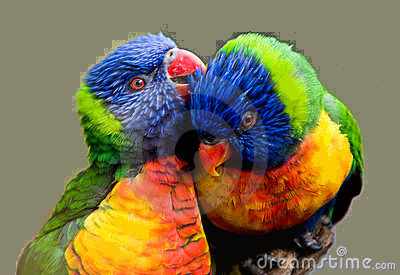

In [36]:
draw(DBSCAN(eps=5, min_samples=1), im)

Для DBSCAN критичен плавный переход цветов, тк при нем совершенно разные цвета могут объединиться, и получится не очень красиво. Соответственно DBSCAN следует изпользовать только на тех изображениях, где есть резкий переход между цветами.

Посмотрим SSIL получившихся изображений на kmeans с оригиналом.

In [38]:
import SSIM_PIL

In [43]:
SSIM_PIL.compare_ssim(im40, im)

0.7106273874207417

In [44]:
xs = np.arange(1, 21)
ys = np.zeros(20)
for i in range(1, 21):
    imi = draw(KMeans(n_clusters=i), im)
    ys[i - 1] = SSIM_PIL.compare_ssim(imi, im)
print(xs)
print(ys)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[0.41677365 0.44146281 0.53990812 0.52998234 0.5470661  0.5508335
 0.55931142 0.56868136 0.58583862 0.60352743 0.60776094 0.61839535
 0.63137451 0.63073548 0.63940673 0.6411447  0.64030422 0.64151005
 0.64356112 0.64217262]


In [45]:
from matplotlib import pyplot as plt
%matplotlib inline

Посмотрим на зависимость SSIM от кол-ва кластеров

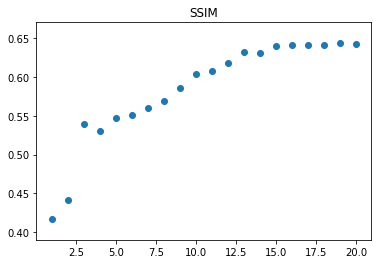

In [49]:
plt.subplot(111)
plt.title("SSIM")
plt.scatter(xs, ys)

То есть, чем больше кластеров, тем больше схожесть изображений (обычно так но всегда)

Попробуем kmeans на других изображениях

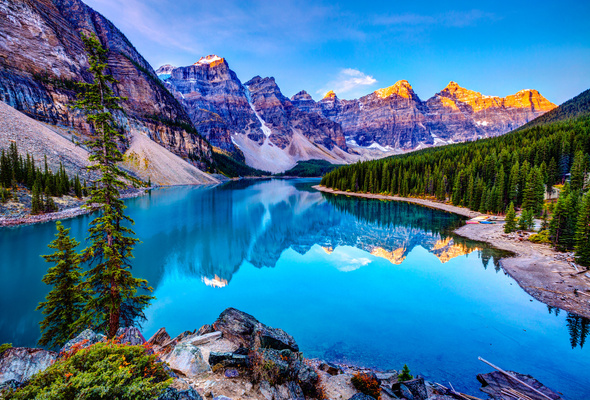

In [52]:
nn = Image.open("nnnnnn.jpg")
nn

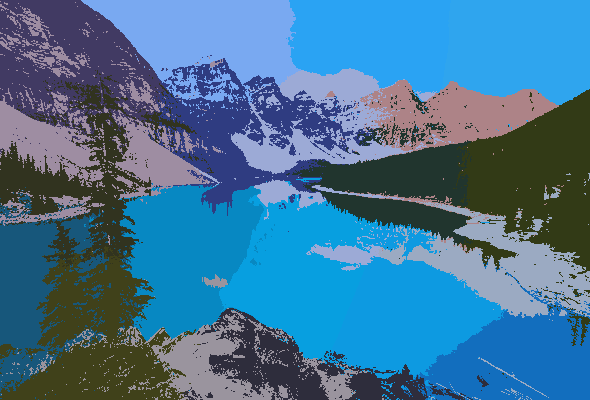

In [54]:
draw(KMeans(n_clusters=20), nn)

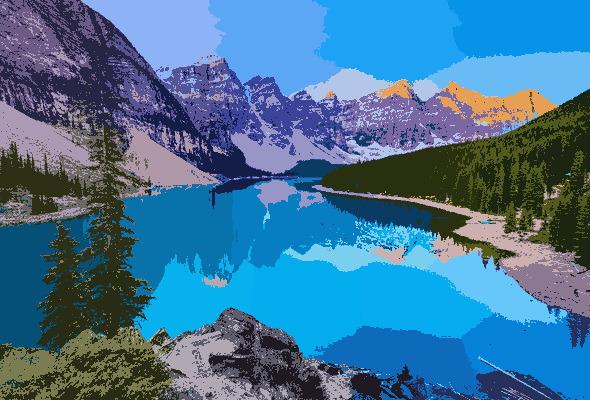

In [55]:
draw(KMeans(n_clusters=40), nn)

Вполне не плохо. Однако на некоторых изображениях kmeans с маленьким кол-вом кластеров выглядит не очень

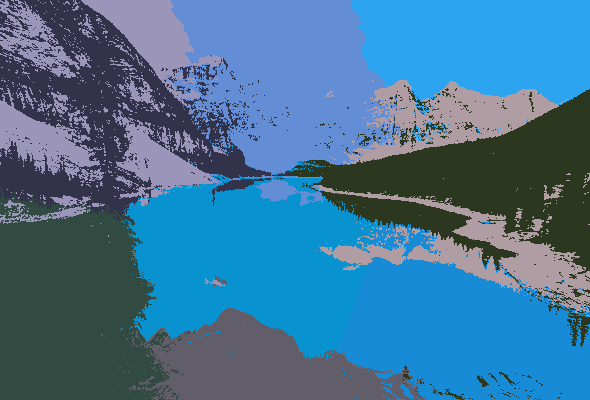

In [56]:
draw(KMeans(n_clusters=10), nn)

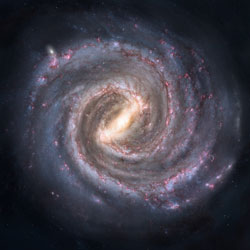

In [58]:
gal = Image.open("galaxy.jpg")
gal

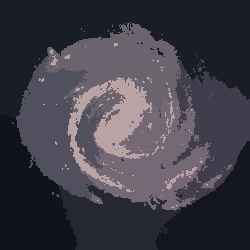

In [59]:
draw(KMeans(n_clusters=10), gal)

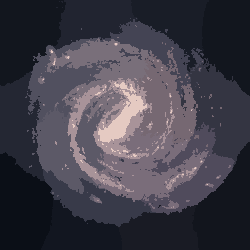

In [60]:
draw(KMeans(n_clusters=20), gal)

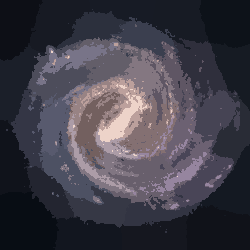

In [61]:
draw(KMeans(n_clusters=40), gal)